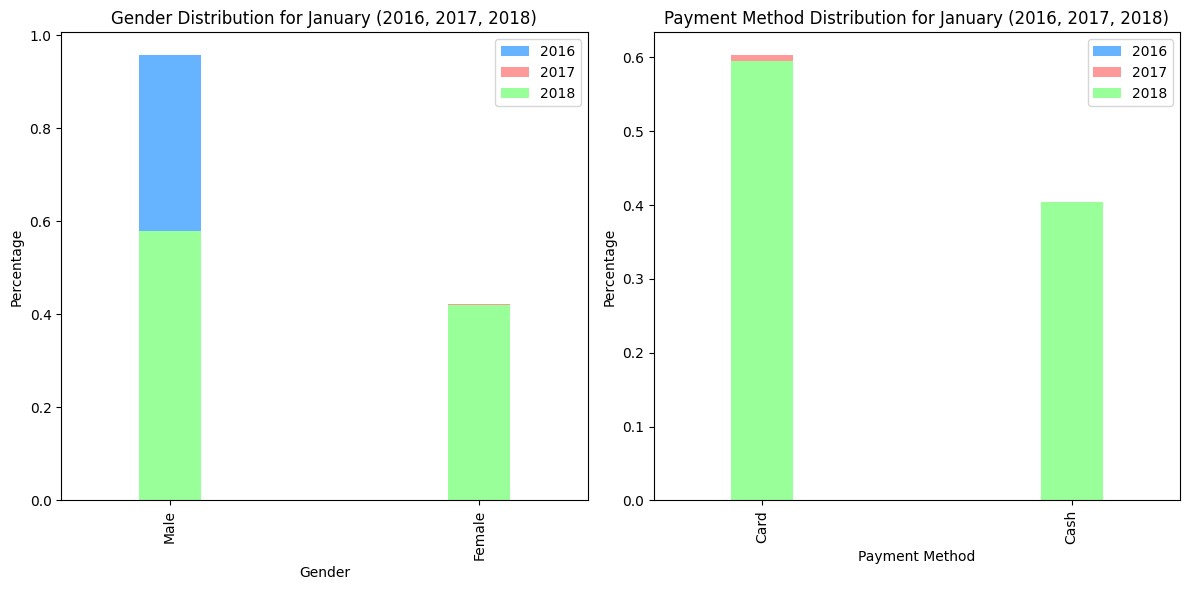

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading CSV files
transaction_df = pd.read_csv('Transaction_ID.csv')
customer_df = pd.read_csv('Customer_ID.csv')
cab_data_df = pd.read_csv('Cab_Data.csv')

# Merging transaction data with customer data
merged_df = pd.merge(transaction_df, customer_df, on='Customer ID', how='left')

# Extracting the year and month from the 'Date of Travel' column in 'Cab_Data.csv'
cab_data_df['Date of Travel'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(cab_data_df['Date of Travel'], unit='D')
cab_data_df['Year'] = cab_data_df['Date of Travel'].dt.year
cab_data_df['Month'] = cab_data_df['Date of Travel'].dt.month

# Filtering transactions for January in each year
january_2016 = merged_df[(merged_df['Payment_Mode'].isin(['Card', 'Credit', 'Cash'])) & (cab_data_df['Year'] == 2016) & (cab_data_df['Month'] == 1)]
january_2017 = merged_df[(merged_df['Payment_Mode'].isin(['Card', 'Credit', 'Cash'])) & (cab_data_df['Year'] == 2017) & (cab_data_df['Month'] == 1)]
january_2018 = merged_df[(merged_df['Payment_Mode'].isin(['Card', 'Credit', 'Cash'])) & (cab_data_df['Year'] == 2018) & (cab_data_df['Month'] == 1)]

# Calculating the distribution of genders and payment methods for each year
gender_distribution_2016 = january_2016['Gender'].value_counts(normalize=True)
gender_distribution_2017 = january_2017['Gender'].value_counts(normalize=True)
gender_distribution_2018 = january_2018['Gender'].value_counts(normalize=True)

payment_distribution_2016 = january_2016['Payment_Mode'].value_counts(normalize=True)
payment_distribution_2017 = january_2017['Payment_Mode'].value_counts(normalize=True)
payment_distribution_2018 = january_2018['Payment_Mode'].value_counts(normalize=True)

# Defining valid and visually appealing colors for the bars
colors = ['#66b3ff', '#ff9999', '#99ff99']

# Creating colorful bar graphs
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
gender_distribution_2016.plot(kind='bar', color=colors[0], label='2016', width=0.2)
gender_distribution_2017.plot(kind='bar', color=colors[1], label='2017', width=0.2)
gender_distribution_2018.plot(kind='bar', color=colors[2], label='2018', width=0.2)
plt.title('Gender Distribution for January (2016, 2017, 2018)')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend()

plt.subplot(1, 2, 2)
payment_distribution_2016.plot(kind='bar', color=colors[0], label='2016', width=0.2)
payment_distribution_2017.plot(kind='bar', color=colors[1], label='2017', width=0.2)
payment_distribution_2018.plot(kind='bar', color=colors[2], label='2018', width=0.2)
plt.title('Payment Method Distribution for January (2016, 2017, 2018)')
plt.xlabel('Payment Method')
plt.ylabel('Percentage')
plt.legend()

plt.tight_layout()
plt.show()
